In [1]:
import torch
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, IncrementalPCA

from check_lang import lang_checker_langdetect, id_to_en
from functions import *
from Preprocessing import *

# pd.options.mode.chained_assignment = None  # default='warn'

d:\GitHub\Jurnal-Clustering\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('data/extracted_publication_journal_s2.csv')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

df.title = df.title.apply(lambda x : x.lower())

df

,journal,title,abstract
0,23380403,purwarupa sistem pemantau dan peringatan kadar...,"<jats:p>High growth in vehicle, contribute air..."
1,23380403,implementasi jaringan syaraf tiruan perambatan...,<jats:p>Gold is one of commodities investment ...
2,23380403,perancangan jaringan sensor terdistribusi untu...,<jats:p>This paper contains distributed sensor...
3,23380403,analisis perbandingan unjuk kerja sistem penye...,<jats:p>The development of internet technology...
4,23380403,pembuatan aplikasi mobile learning sebagai sar...,<jats:p>Mobile learning is the intersection of...
...,...,...,...
239319,28093216,analysis of literacy-based learning media prod...,<jats:p>Literacy is an important skill that ev...
239320,28093216,implementation of steam-based digital learning...,<jats:p>The lack of optimal empowerment of eff...
239321,28093216,web-cms based as teaching materials to improve...,<jats:p>Technology advances and the profusion ...
239322,28093216,sw-blend: student worksheets for blended learn...,<jats:p>Blended learning is learning that is a...


In [3]:
df['data_cleaned'] = df.abstract.apply(preprocess_text)
df['data_cleaned'] = df.loc[:, ['title', 'data_cleaned']].apply(lambda x : '{} {}'.format(x[0], x[1]), axis = 1)  
df['lang'] = df.data_cleaned.apply(lang_checker_langdetect)
df = df[df.lang.isin(['en', 'id'])]
df.loc[:, 'label'] = 0

df

C:\Users\rarmn\AppData\Local\Temp\ipykernel_3568\711114739.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['data_cleaned'] = df.loc[:, ['title', 'data_cleaned']].apply(lambda x : '{} {}'.format(x[0], x[1]), axis = 1)


An error occurred: No features in text. text :  - 
An error occurred: No features in text. text :  . 
An error occurred: No features in text. text :  pemodelan dinam
An error occurred: No features in text. text :  pengaruh penamb
An error occurred: No features in text. text :  analisis cost v
An error occurred: No features in text. text :  pengaruh nisbah
An error occurred: No features in text. text :  keputusan petan
An error occurred: No features in text. text :  analisis kinerj
An error occurred: No features in text. text :  keragaan dan ke
An error occurred: No features in text. text :  perbaikan kuali
An error occurred: No features in text. text :  keunggulan komp
An error occurred: No features in text. text :  tingkat daya sa
An error occurred: No features in text. text :  keragaan dan ha
An error occurred: No features in text. text :  𝗣𝗲𝗺𝗮𝗻𝗳𝗮𝗮𝘁𝗮𝗻 𝗹𝗶𝗺
An error occurred: No features in text. text :  - 


C:\Users\rarmn\AppData\Local\Temp\ipykernel_3568\711114739.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'label'] = 0


,journal,title,abstract,data_cleaned,lang,label
0,23380403,purwarupa sistem pemantau dan peringatan kadar...,"<jats:p>High growth in vehicle, contribute air...",purwarupa sistem pemantau dan peringatan kadar...,en,0
1,23380403,implementasi jaringan syaraf tiruan perambatan...,<jats:p>Gold is one of commodities investment ...,implementasi jaringan syaraf tiruan perambatan...,en,0
2,23380403,perancangan jaringan sensor terdistribusi untu...,<jats:p>This paper contains distributed sensor...,perancangan jaringan sensor terdistribusi untu...,en,0
3,23380403,analisis perbandingan unjuk kerja sistem penye...,<jats:p>The development of internet technology...,analisis perbandingan unjuk kerja sistem penye...,en,0
4,23380403,pembuatan aplikasi mobile learning sebagai sar...,<jats:p>Mobile learning is the intersection of...,pembuatan aplikasi mobile learning sebagai sar...,en,0
...,...,...,...,...,...,...
239319,28093216,analysis of literacy-based learning media prod...,<jats:p>Literacy is an important skill that ev...,analysis of literacy-based learning media prod...,en,0
239320,28093216,implementation of steam-based digital learning...,<jats:p>The lack of optimal empowerment of eff...,implementation of steam-based digital learning...,en,0
239321,28093216,web-cms based as teaching materials to improve...,<jats:p>Technology advances and the profusion ...,web-cms based as teaching materials to improve...,en,0
239322,28093216,sw-blend: student worksheets for blended learn...,<jats:p>Blended learning is learning that is a...,sw-blend: student worksheets for blended learn...,en,0


In [12]:
df.to_csv('data/data_sinta_cleaned_s2.csv', index=False)

In [4]:
df.lang.unique()

array(['en', 'id'], dtype=object)

In [5]:
df.data_cleaned.sample().values[-1]

'strategi manajemen perubahan dalam mendukung implementasi budaya organisasi : studi kasus pt. bersama zatta jaya (elcorps) the main problem in this research is the demand for companies to change so they can always be able to adapt to external and internal developments so that they remain to exist and are competitive one way to make a planned change strategy is managed well so that it will have a positive impact on achieving company goals this study aims to analyze the change strategy undertaken by pt joint zatta jaya elcorps through changes incorporates values and culture the method used in this study is qualitative research methods primary data collection techniques are done by triangulation of techniques in the form of interviews with informants from company managers participatory observation and questionnaire distribution secondary data collection by collecting data from journal sources and company reports the results of this study indicate that change management at elcorps is in t

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_checkpoint = 'bert-base-cased'
model_checkpoint2 = 'indobenchmark/indobert-base-p1'

bert_path = 'model/bert_pipeline3_3_123.pt'
model_bert = BertClassifierEmbed(123, model_checkpoint)
checkpoint_bert = torch.load(bert_path)
model_bert.load_state_dict(checkpoint_bert)

indobert_path = 'model/indobert_pipeline3_3_55.pt'
model_indobert = BertClassifierEmbed(55, model_checkpoint2)
checkpoint_indobert = torch.load(indobert_path)
model_indobert.load_state_dict(checkpoint_indobert)

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

<All keys matched successfully>

In [7]:
journal_type = 'pipeline_3_1'

file_path = os.path.join('src', journal_type)

if not os.path.exists(file_path):
    os.mkdir(file_path)

In [8]:
data = df

selected_journal_en = data[data.lang == 'en']
selected_journal_id = data[data.lang == 'id']

selected_journal_en

,journal,title,abstract,data_cleaned,lang,label
0,23380403,purwarupa sistem pemantau dan peringatan kadar...,"<jats:p>High growth in vehicle, contribute air...",purwarupa sistem pemantau dan peringatan kadar...,en,0
1,23380403,implementasi jaringan syaraf tiruan perambatan...,<jats:p>Gold is one of commodities investment ...,implementasi jaringan syaraf tiruan perambatan...,en,0
2,23380403,perancangan jaringan sensor terdistribusi untu...,<jats:p>This paper contains distributed sensor...,perancangan jaringan sensor terdistribusi untu...,en,0
3,23380403,analisis perbandingan unjuk kerja sistem penye...,<jats:p>The development of internet technology...,analisis perbandingan unjuk kerja sistem penye...,en,0
4,23380403,pembuatan aplikasi mobile learning sebagai sar...,<jats:p>Mobile learning is the intersection of...,pembuatan aplikasi mobile learning sebagai sar...,en,0
...,...,...,...,...,...,...
239319,28093216,analysis of literacy-based learning media prod...,<jats:p>Literacy is an important skill that ev...,analysis of literacy-based learning media prod...,en,0
239320,28093216,implementation of steam-based digital learning...,<jats:p>The lack of optimal empowerment of eff...,implementation of steam-based digital learning...,en,0
239321,28093216,web-cms based as teaching materials to improve...,<jats:p>Technology advances and the profusion ...,web-cms based as teaching materials to improve...,en,0
239322,28093216,sw-blend: student worksheets for blended learn...,<jats:p>Blended learning is learning that is a...,sw-blend: student worksheets for blended learn...,en,0


In [9]:
selected_journal_id

,journal,title,abstract,data_cleaned,lang,label
6,23380403,pengembangan simulasi peternakan sapi perah de...,<jats:p>Kebutuhan akan susu sapi segar yang be...,pengembangan simulasi peternakan sapi perah de...,id,0
7,23380403,analisis usabilitas pada permainan 'the zoo' b...,<jats:p>Interaksi manusia dan komputer merupak...,analisis usabilitas pada permainan 'the zoo' b...,id,0
8,23380403,perancangan permainan mengasah daya ingat “mem...,<jats:p>Selama ini permainan anak-anak dilakuk...,perancangan permainan mengasah daya ingat “mem...,id,0
10,23380403,pengembangan aplikasi berbasis web untuk menam...,<jats:p>Aplikasi berbasis web telah banyak dig...,pengembangan aplikasi berbasis web untuk menam...,id,0
11,23380403,"perancangan aplikasi toko online ""xo-licious"" ...",<jats:p>XO-Licious merupakan sebuah toko onlin...,"perancangan aplikasi toko online ""xo-licious"" ...",id,0
...,...,...,...,...,...,...
238889,23558520,meningkatkan daya saing daerah melalui peningk...,<jats:p>The purpose of this study was to test ...,meningkatkan daya saing daerah melalui peningk...,id,0
238890,23558520,analisis flypaper effect pada belanja daerah (...,<jats:p>This research aims to compare the fisc...,analisis flypaper effect pada belanja daerah (...,id,0
238891,23558520,pemanfaatan dana corporate social responsibili...,<jats:p>This study aims to describe the distri...,pemanfaatan dana corporate social responsibili...,id,0
238894,23558520,socio-economic determinants of tourism trips b...,<jats:p>This study aims to analyze: 1) charact...,socio-economic determinants of tourism trips b...,id,0


In [10]:
embedding_en = embed(selected_journal_en, model_checkpoint, model_bert, device = device)
embedding_en.shape

In [11]:
embedding_id = embed(selected_journal_id, model_checkpoint2, model_indobert, device = device)
embedding_id.shape, type(embedding_id[0][0][0])


d:\GitHub\Jurnal-Clustering\venv\lib\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


((52317, 128, 768), numpy.float16)

In [12]:
for i in range(len(selected_journal_en) // 5000):
    embedding_en = embed(selected_journal_en.iloc[i*5000 : 5000 + i*5000], model_checkpoint, model_bert, device = device)
    embeddings = np.append(embeddings, embedding_en, axis = 0)
    np.save(f"{file_path}/{'sinta_1'}_bert_data.npy", embeddings.reshape(embeddings.shape[0], -1))
    len(embeddings)

In [138]:
embeddings = np.append(embedding_en, embedding_id, axis = 0)
embeddings.shape

MemoryError: Unable to allocate 10.3 GiB for an array with shape (56101, 128, 768) and data type float16

In [ ]:
np.save(f"{file_path}/{'sinta_1'}_bert_data.npy", embeddings.reshape(embeddings.shape[0], -1))
X_ = embeddings.reshape(embeddings.shape[0], -1)

In [20]:
X_ = embedding_id
X_ = X_.reshape(X_.shape[0], -1)

In [21]:
n = X_.shape[0] # how many rows we have in the X_set
chunk_size = 1000 # how many rows we feed to IPCA at a time, the divisor of n
ipca = IncrementalPCA(n_components=2, batch_size=16)

for i in range(0, n//chunk_size):
    ipca.partial_fit(X_[i*chunk_size : (i+1)*chunk_size])

ipca.partial_fit(X_[(i+1)*chunk_size:])


In [22]:
import pickle as pk

pk.dump(ipca, open("pca.pkl","wb"))


# later reload the pickle file
# ipca = pk.load(open(f"{file_path}/{'sinta_1'}/pca.pkl",'rb'))


In [23]:
X = ipca.transform(X_[0*chunk_size : (0+1)*chunk_size])

for i in range(1, n//chunk_size):
    X = np.append(X, ipca.transform(X_[i*chunk_size : (i+1)*chunk_size]), axis = 0)

X = np.append(X, ipca.transform(X_[(i+1)*chunk_size:]), axis=0)

In [52]:
# Perform KMeans clustering
num_clusters = 39
kmeans = KMeans(n_clusters=num_clusters, random_state=0, max_iter=1000)
kmeans.fit(X)

KMeans(max_iter=1000, n_clusters=39, random_state=0)

In [166]:
df_res = pd.concat([selected_journal_en, selected_journal_id])

cluster_labels = kmeans.labels_

# Mendapatkan koordinat pusat cluster
centroids = kmeans.cluster_centers_

# Menghitung jarak antara setiap titik data dengan centroid
jarak_ke_centroid = centroid_dist(kmeans, X)

# Menentukan batas jarak yang dianggap sebagai "outscoop"
threshold = outscoop_threshold(jarak_ke_centroid)

scoop_labels = np.ones(len(X))
scoop_labels[jarak_ke_centroid > threshold] = -1

save_data('sinta1', journal_type, kmeans, threshold, X, df_res[['data_cleaned', 'journal', 'lang']], scoop_labels)

print("Data sebaran PCA telah disimpan.")

C:\Users\rarmn\AppData\Local\Temp\ipykernel_19796\3237488746.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label'] = scoop_labels


Data sebaran PCA telah disimpan.


d:\GitHub\Jurnal-Clustering\functions.py:59: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  plot = sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='plot_color', data=df_pca, palette=cluster_palette)


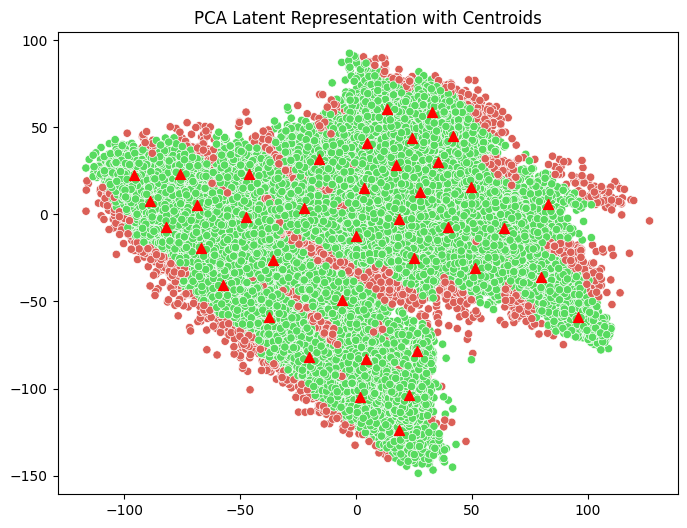

In [2]:
jurnal_id = f'sinta_1'
jurnal_type = 'pipeline_3_1'

kmeans, threshold, X, df_res = load_data(jurnal_id, jurnal_type)
journal = list(df_res.journal.apply(lambda x : 1 if x == '25277456' else 0))
scoop_labels = df_res.Label
lang = list(df_res.lang)
# journal = list(df_res.journal)

plot_vector_distribution(X, kmeans, scoop_labels, check_outscoop='focus')

In [8]:
df_res

,Unnamed: 0,data_cleaned,journal,lang,kmeans_labels,Label
0,0,localization schemes in underwater sensor netw...,25024760,en,17,1.0
1,1,a review on voltage balancing solutions in mul...,25024760,en,32,1.0
2,2,collision detection and trajectory planning fo...,25024760,en,2,1.0
3,3,a new method for optimal coordination of overc...,25024760,en,12,1.0
4,4,fairness evaluation and comparison of current ...,25024760,en,23,1.0
...,...,...,...,...,...,...
56096,56286,hesperitin synergistically promotes the senesc...,25409581,en,13,1.0
56097,56287,first report on wild occurrences of phoenix mu...,25409581,en,7,1.0
56098,56288,nannoplankton biostratigraphy from banggaisula...,25409581,en,29,1.0
56099,56289,spatial modelling habitat suitability of javan...,25409581,en,19,1.0


In [10]:
from keybert import KeyBERT

# df_res['kmeans_labels'] = cluster_labels

keyphrase = {}

kw_model = KeyBERT()

for k in range(39):
    doc = ' '.join(list(df_res[df_res.kmeans_labels == k].data_cleaned))
    keywords = kw_model.extract_keywords(doc)

    keyphrase[k] = keywords

d:\GitHub\Jurnal-Clustering\venv\lib\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


In [18]:
df_res.data_cleaned.sample().values[-1]

'initial stage in designing household constructed wetlands selection of a suitable aquatic plantconstructing centralized wastewater treatment plant systems to serve and control city sanitation requirements is vastly expensive in developing countries consequently employing decentralized wastewater treatment systems through utilizing constructed wetlands cws for individual households should be promoted in this study the most appropriate aquatic species planted in constructed wetlands were examined for treating greywater at the household level in humid tropical regions three different decorative aquatic plants i e  echinodorus palaefolius typha latifolia and cyperus alternifolius were compared based on their performances also three similar wetlands having a total working volume of   liters with a gravel sand filter were used in this study one day a period was allocated for the hydraulic retention time hrt which corresponds to the applied hydraulic loading rate of   and  mm d for the first

In [20]:
output = {
    'cluster' : [],
    'key' : []
}

for i, j in keyphrase.items():
    output['cluster'].append(i)
    output['key'].append(j)

filepath = f'./src/pipeline_3_1/sinta_1/'
output = pd.DataFrame(output)
output.to_csv(f'{filepath}keyphrase_sinta1_3_1.csv')
output

PermissionError: [Errno 13] Permission denied: './src/pipeline_3_1/sinta_1/keyphrase_sinta1_3_1.csv'

In [23]:
output.to_csv(f'{filepath}keyphrase_sinta1_3_1_2.csv', index=False)


In [ ]:
outscope = df_res[scoop_labels == -1]
outscope.to_csv('outscope_25024760_pipeline3_2.csv')